# Proyek Akhir : Klasifikasi Gambar
Nama: Zidni Iman Sholihati

 profil: [URL](https://project.com/users/amirah_zidni)

Email: zidni.imani@gmail.com / m1821860@bangkit.academy



Intruksi/kriteria submission:
1. Dataset yang dipakai haruslah dataset berikut : [rockpaperscissors](https://academy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip).
2. Dataset harus dibagi menjadi train set dan validation set.
Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
3. Harus mengimplementasikan augmentasi gambar.
4. Menggunakan image data generator.
5. Model harus menggunakan model sequential.
6. Pelatihan model tidak melebihi waktu 30 menit.
7. Program dikerjakan pada Google Colaboratory. (done)
8. Akurasi dari model minimal 85%.
9. Dapat memprediksi gambar yang diunggah ke Colab.
10. Manambahkan data diri (sesuai profil) pada submission/project yang dikirimkan. (done)



Saran submission
1. Akurasi dari model di atas 85%
2. Anda menggunakan lebih dari 1 hidden layer.
3. Menerapkan lebih banyak augmentasi gambar.
4. Anda menggunakan optimizer dan loss-function yang tidak diajarkan di kelas.

In [60]:
# Import library
import zipfile
import os
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files
from keras.preprocessing import image
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

# 1. Download Dataset
Dataset yang dipakai haruslah dataset berikut : rockpaperscissors.

In [ ]:
!wget --no-check-certificate \
      https://academy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
      -O /content/rockpaperscissors.zip

In [3]:
# unzip file
zip_file = '/content/rockpaperscissors.zip'
with zipfile.ZipFile(zip_file, 'r') as zip:
  zip.extractall('/content')

In [4]:
# variabel directory
sumber_dir = "/content/rockpaperscissors"
base_dir = "/content/rock-paper-scissors"

sumber_rock_dir = os.path.join(sumber_dir, 'rock')
sumber_paper_dir = os.path.join(sumber_dir, 'paper')
sumber_scissors_dir = os.path.join(sumber_dir, 'scissors')

train_dir =  os.path.join(base_dir, 'train')
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_dir =  os.path.join(base_dir, 'validation')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

# cek dataset
print(len(os.listdir(sumber_rock_dir)))
print(len(os.listdir(sumber_paper_dir)))
print(len(os.listdir(sumber_scissors_dir)))

726
712
750


# 2. Splitting Dataset
Dataset harus dibagi menjadi train set dan validation set. Ukuran validation set harus 40% dari total dataset.

Data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel

In [5]:
# membuat directory
list_dir = [base_dir,
            train_dir,
            validation_dir,
            train_rock_dir,
            train_paper_dir,
            train_scissors_dir,
            validation_rock_dir,
            validation_paper_dir,
            validation_scissors_dir,
            ]
for dir in list_dir:
  try:
    os.mkdir(dir)
  except:
    print("Directory sudah ada")

In [6]:
# membuat splitter function dataset

def splitter(sumber, train, validation, size):
  """
  1. Mengambil list secara acak dari directory asal
  2. Mengambil train data (60%) dari list acak
  3. Sisanya (40%) masuk validation data 
  """
  # 1. Mengambil list secara acak dari directory asal
  list_acak = random.sample(os.listdir(sumber), len(os.listdir(sumber)))

  # 2. Mengambil validation data 40% dari list acak
  train_list = list_acak[int(len(list_acak)*size)+1:]
  for acak in list_acak:
    if acak in train_list:
      copyfile(sumber + "/" + acak, train + "/" + acak)
    else:
      copyfile(sumber + "/" + acak, validation + "/" + acak)

split = .4
# split berdasarkan kategori
splitter(sumber_rock_dir, train_rock_dir, validation_rock_dir, split)
splitter(sumber_paper_dir, train_paper_dir, validation_paper_dir, split)
splitter(sumber_scissors_dir, train_scissors_dir, validation_scissors_dir, split)

In [7]:
# cek hasilnya: Data training 1314, data validasi 874

jumlah_train = len(os.listdir(train_rock_dir)) + len(os.listdir(train_paper_dir)) + len(os.listdir(train_scissors_dir))
jumlah_validation = len(os.listdir(validation_rock_dir)) + len(os.listdir(validation_paper_dir)) + len(os.listdir(validation_scissors_dir))
print("Jumlah train set: ", jumlah_train)
print("Jumlah validation set: ", jumlah_validation)

Jumlah train set:  1311
Jumlah validation set:  877


# Augmentasi gambar
Harus mengimplementasikan augmentasi gambar.

In [8]:
# train data image generator
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# validation data image generator
validation_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Generator dari datagen

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='categorical',
    target_size=(150, 150)
    )
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='categorical',
    target_size=(150, 150)
    )

Found 1311 images belonging to 3 classes.
Found 877 images belonging to 3 classes.


# Membuat model #1
Model harus menggunakan model sequential.

## Pretrained model Inception V3

In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/inception.h5

model_dir = "/content/inception.h5"
inception_model = InceptionV3(input_shape = (150, 150, 3),
                               include_top = False,
                               weights = None)

inception_model.load_weights(model_dir)

# Setting freeze inception model yg sudah di load
for layer in inception_model.layers:
  layer.trainable = False

--2021-06-12 08:40:37--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/content/inception.h5’

/content/inception. 100%[===================>]  83.84M   114MB/s    in 0.7s    

2021-06-12 08:40:38 (114 MB/s) - ‘/content/inception.h5’ saved [87910968/87910968]



## Model

In [10]:
model = tf.keras.models.Sequential([
    inception_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 31,242,019
Trainable params: 9,439,235
Non-trainable params: 21,802,784
_________________________________________________________________


## Callback
Training akan berhenti saat akurasi mencapai 96%

In [12]:
akurasi = 0.96

class callbackAcc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>akurasi):
      print("\nTraining selesai, akurasi lebih dari 96%")
      self.model.stop_training = True

## Melatih model
Pelatihan model tidak melebihi waktu 30 menit.

In [13]:
# Memanggil callback class
callback = callbackAcc()

# taruh dalam history agar bisa menampilkan perkembangan training
history = model.fit(
                    train_generator,
                    steps_per_epoch=25,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2,
                    callbacks=[callback]
                    )

Epoch 1/25
25/25 - 38s - loss: 2.5711 - accuracy: 0.7220 - val_loss: 0.4194 - val_accuracy: 0.9200
Epoch 2/25
25/25 - 5s - loss: 0.6498 - accuracy: 0.8167 - val_loss: 0.1102 - val_accuracy: 0.9600
Epoch 3/25
25/25 - 5s - loss: 0.4771 - accuracy: 0.8780 - val_loss: 0.9935 - val_accuracy: 0.7600
Epoch 4/25
25/25 - 5s - loss: 0.3182 - accuracy: 0.9160 - val_loss: 0.5450 - val_accuracy: 0.8700
Epoch 5/25
25/25 - 5s - loss: 0.3944 - accuracy: 0.9200 - val_loss: 0.4339 - val_accuracy: 0.8900
Epoch 6/25
25/25 - 5s - loss: 0.5725 - accuracy: 0.8820 - val_loss: 0.7029 - val_accuracy: 0.8100
Epoch 7/25
25/25 - 5s - loss: 0.3037 - accuracy: 0.9200 - val_loss: 0.3172 - val_accuracy: 0.9300
Epoch 8/25
25/25 - 5s - loss: 0.2933 - accuracy: 0.9240 - val_loss: 0.1078 - val_accuracy: 0.9700
Epoch 9/25
25/25 - 5s - loss: 0.2666 - accuracy: 0.9380 - val_loss: 0.2322 - val_accuracy: 0.9300
Epoch 10/25
25/25 - 5s - loss: 0.3403 - accuracy: 0.9100 - val_loss: 0.4951 - val_accuracy: 0.8500
Epoch 11/25
25/25 

## Akurasi Model
Akurasi dari model minimal 85%

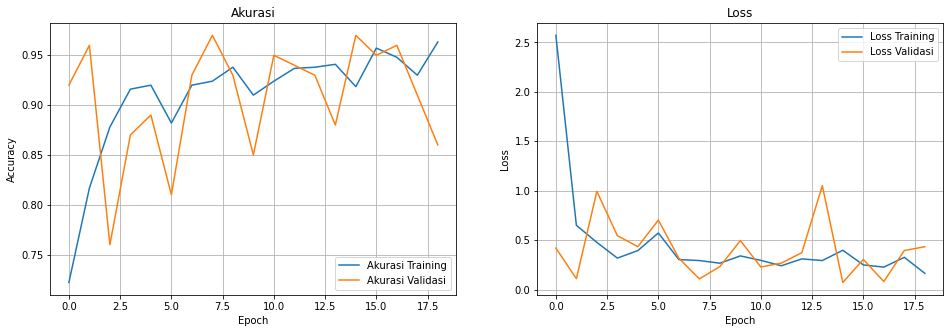

In [14]:
def plot_result(history):
  plt.figure(figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Akurasi Training')
  plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
  plt.title('Akurasi')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Loss Training')
  plt.plot(history.history['val_loss'], label='Loss Validasi')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

plot_result(history)

# Membuat model #2

## Pretrained model MobileNetV2

In [22]:
mobileNet_model = tf.keras.applications.MobileNetV2(
                              input_shape = (150, 150, 3),
                              include_top = False)
for layer in mobileNet_model.layers:
  layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


## Model #2

In [28]:
model2 = tf.keras.models.Sequential([
    mobileNet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])
model2.summary()
model2.compile(
    loss="categorical_crossentropy",
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_4 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               16384512  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1539      
Total params: 18,644,035
Trainable params: 16,386,051
Non-trainable params: 2,257,984
_________________________________________________________________


## Melatih model #2

In [29]:
history2 = model2.fit(
                    train_generator,
                    steps_per_epoch=25,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2,
                    callbacks=[callback]
                    )
model2.save('model_mnv2.h5')

Epoch 1/25
25/25 - 8s - loss: 22.6273 - accuracy: 0.7200 - val_loss: 4.0605 - val_accuracy: 0.8700
Epoch 2/25
25/25 - 4s - loss: 3.3943 - accuracy: 0.8740 - val_loss: 5.7087 - val_accuracy: 0.8500
Epoch 3/25
25/25 - 4s - loss: 2.7601 - accuracy: 0.8760 - val_loss: 0.4970 - val_accuracy: 0.9300
Epoch 4/25
25/25 - 4s - loss: 0.9758 - accuracy: 0.9440 - val_loss: 0.5250 - val_accuracy: 0.9400
Epoch 5/25
25/25 - 4s - loss: 1.4025 - accuracy: 0.9020 - val_loss: 1.1800 - val_accuracy: 0.9200
Epoch 6/25
25/25 - 4s - loss: 1.2665 - accuracy: 0.9206 - val_loss: 0.9755 - val_accuracy: 0.9500
Epoch 7/25
25/25 - 4s - loss: 1.0040 - accuracy: 0.9260 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/25
25/25 - 4s - loss: 0.8555 - accuracy: 0.9400 - val_loss: 0.0139 - val_accuracy: 0.9900
Epoch 9/25
25/25 - 4s - loss: 0.9611 - accuracy: 0.9165 - val_loss: 0.4075 - val_accuracy: 0.9400
Epoch 10/25
25/25 - 4s - loss: 0.4122 - accuracy: 0.9580 - val_loss: 0.3241 - val_accuracy: 0.9600
Epoch 11/25
25/25 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Akurasi model #2

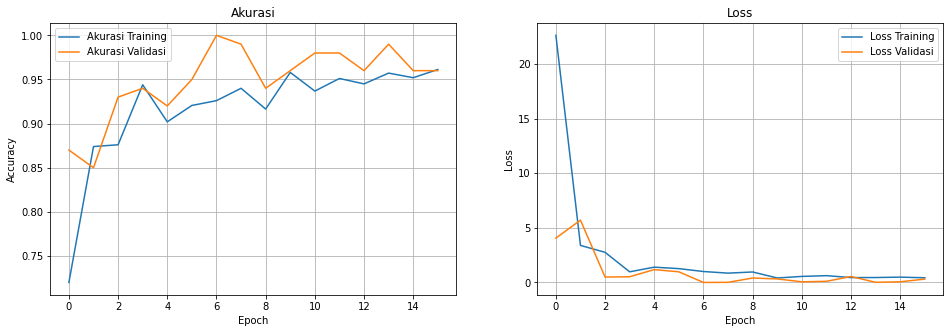

In [30]:
plot_result(history2)

**Kita akan mencoba cell bawah ini menggunakan model #2 yang memiliki akurasi lebih tinggi.**

# Test upload Google Colab
Dapat memprediksi gambar yang diunggah ke Colab.

Saving rock2.png to rock2 (3).png
Saving paper.png to paper (4).png
Saving rock.png to rock (5).png
rock2.png
Prediksi: Batu/Rock
paper.png
Prediksi: Kertas/Paper
rock.png
Prediksi: Batu/Rock


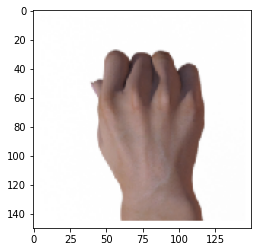

In [59]:
%matplotlib inline
uploaded = files.upload()
for f in uploaded.keys():
  img = image.load_img(f, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = model2.predict(images, batch_size=10)
  
  print(f)
  result = np.where(pred == np.max(pred))
  if result[1] == 0:
    print("Prediksi: Batu/Rock")
  elif result[1] == 1:
    print("Prediksi: Kertas/Paper")
  elif result[1] == 2:
    print("Prediksi: Gunting/Scissors")
